# Praças de João Pessoa

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

### Lendo de geodata-jp

In [3]:
pracas = gpd.read_file('https://raw.githubusercontent.com/paulovitorweb/geodata-jp/main/data/pracas.geojson')

In [4]:
pracas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   bairro    213 non-null    object  
 1   nome      213 non-null    object  
 2   area      212 non-null    object  
 3   geometry  214 non-null    geometry
dtypes: geometry(1), object(3)
memory usage: 6.8+ KB


In [5]:
pracas.head()

,bairro,nome,area,geometry
0,ERNESTO GEISEL,PRAÇA ORLANDO GEISEL,"3497,98600310013","POLYGON Z ((-34.86926 -7.17795 0.00000, -34.86..."
1,ERNESTO GEISEL,PRAÇA RADIALISTA PASCOAL CARRILHO,"2620,63999998348","POLYGON Z ((-34.87292 -7.18300 48.96000, -34.8..."
2,BESSA,PRAÇA DJALMA GOMES DA FONSECA - PRAÇA DO CAJU,"7695,04039995941","POLYGON Z ((-34.84340 -7.06852 5.36000, -34.84..."
3,AEROCLUBE,PRAÇA FRANCISCO EVARISTO DOS SANTOS,"758,679452962841","POLYGON Z ((-34.84002 -7.09656 0.00000, -34.84..."
4,AEROCLUBE,PRAÇA CELIA SANTIAGO,"8066,92307513824","POLYGON Z ((-34.84308 -7.09773 0.00000, -34.84..."


In [6]:
pracas = pracas.drop(columns=['area'])
pracas.head()

,bairro,nome,geometry
0,ERNESTO GEISEL,PRAÇA ORLANDO GEISEL,"POLYGON Z ((-34.86926 -7.17795 0.00000, -34.86..."
1,ERNESTO GEISEL,PRAÇA RADIALISTA PASCOAL CARRILHO,"POLYGON Z ((-34.87292 -7.18300 48.96000, -34.8..."
2,BESSA,PRAÇA DJALMA GOMES DA FONSECA - PRAÇA DO CAJU,"POLYGON Z ((-34.84340 -7.06852 5.36000, -34.84..."
3,AEROCLUBE,PRAÇA FRANCISCO EVARISTO DOS SANTOS,"POLYGON Z ((-34.84002 -7.09656 0.00000, -34.84..."
4,AEROCLUBE,PRAÇA CELIA SANTIAGO,"POLYGON Z ((-34.84308 -7.09773 0.00000, -34.84..."


### Transformando para coordenadas métricas

In [7]:
pracas = pracas.to_crs('EPSG:31985')
pracas.crs

<Projected CRS: EPSG:31985>
Name: SIRGAS 2000 / UTM zone 25S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 36°W and 30°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-36.0, -23.8, -29.99, 4.19)
Coordinate Operation:
- name: UTM zone 25S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Calculando a área

In [8]:
pracas['area_m2'] = pracas['geometry'].area
pracas.head()

,bairro,nome,geometry,area_m2
0,ERNESTO GEISEL,PRAÇA ORLANDO GEISEL,"POLYGON ((293582.019 9206159.013, 293583.120 9...",3500.708264
1,ERNESTO GEISEL,PRAÇA RADIALISTA PASCOAL CARRILHO,"POLYGON ((293180.220 9205597.923, 293181.211 9...",2619.178130
2,BESSA,PRAÇA DJALMA GOMES DA FONSECA - PRAÇA DO CAJU,"POLYGON ((296390.569 9218272.870, 296392.878 9...",7698.145543
3,AEROCLUBE,PRAÇA FRANCISCO EVARISTO DOS SANTOS,"POLYGON ((296776.311 9215173.161, 296776.530 9...",760.352547
4,AEROCLUBE,PRAÇA CELIA SANTIAGO,"POLYGON ((296438.193 9215042.411, 296439.160 9...",8068.992371


### Plotando gráficos

<AxesSubplot:ylabel='nome'>

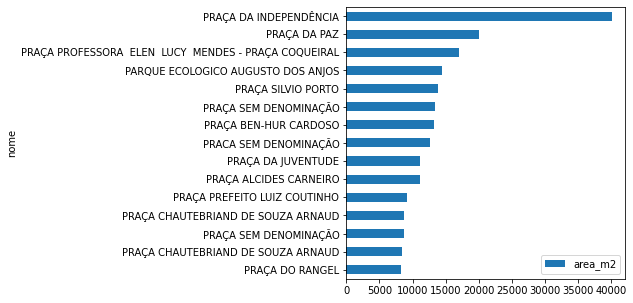

In [9]:
pracas.sort_values(by='area_m2')[-15:].plot.barh(x='nome', y='area_m2', figsize=(5,5))

### Plotando mapas

In [10]:
bairros = gpd.read_file('https://raw.githubusercontent.com/paulovitorweb/geodata-jp/main/data/bairros.geojson')
bairros = bairros.to_crs('EPSG:31985')

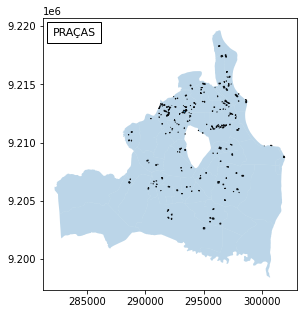

In [11]:
def _insert_title(title, ax):
    at = AnchoredText(title, prop={'size': 11}, frameon=True, loc='upper left')
    at.patch.set_boxstyle('square,pad=0.1')
    ax.add_artist(at)

def plot():
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    _insert_title('PRAÇAS', ax)
    bairros.plot(ax=ax, alpha=0.3, zorder=1)
    pracas.plot(ax=ax, alpha=0.9, edgecolor='k', zorder=2)

plot()

## Respondendo algumas perguntas

### Quantos metros quadrados João Pessoa tem de praças?

In [12]:
pracas['area_m2'].sum()

617983.397359327

João Pessoa tem pouco mais de 600 mil metros quadrados de praças.

### Qual a cobertura das praças num raio de 500 metros?

Na literatura 500 metros é uma distância de caminhada considerada, via de regra, razoável.

<AxesSubplot:>

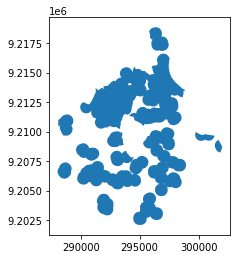

In [13]:
def get_pracas_500m():
    buffer = pracas['geometry'].buffer(500).unary_union
    buffer_gdf = gpd.GeoDataFrame(crs=pracas.crs, geometry=[buffer])
    return gpd.clip(buffer_gdf, bairros.dissolve())

pracas_500m = get_pracas_500m()
pracas_500m.plot()

In [14]:
(pracas_500m['geometry'].area.sum() / 1000000) / (bairros['geometry'].area.sum() / 1000000)

0.34812778534438826

Cerca de 35% do território de João Pessoa, considerando os polígonos dos bairros, está há pelo menos 500 metros de uma ou mais praças.

### E a cobertura por bairro?

In [15]:
bairros_clipped = bairros.clip(pracas_500m.dissolve())
bairros_clipped['area_pracas_500m'] = bairros_clipped['geometry'].area
bairros['area_m2'] = bairros['geometry'].area

In [16]:
bairros = bairros.set_index('nome').join(bairros_clipped.set_index('nome'), lsuffix='_orig', rsuffix='_clip')

In [17]:
bairros['area_pracas_500m'].fillna(0, inplace=True)
bairros = bairros.reset_index()

In [18]:
bairros['coverage'] = bairros.area_pracas_500m / bairros.area_m2

In [19]:
bairros['geometry'] = bairros.geometry_orig

<AxesSubplot:ylabel='nome'>

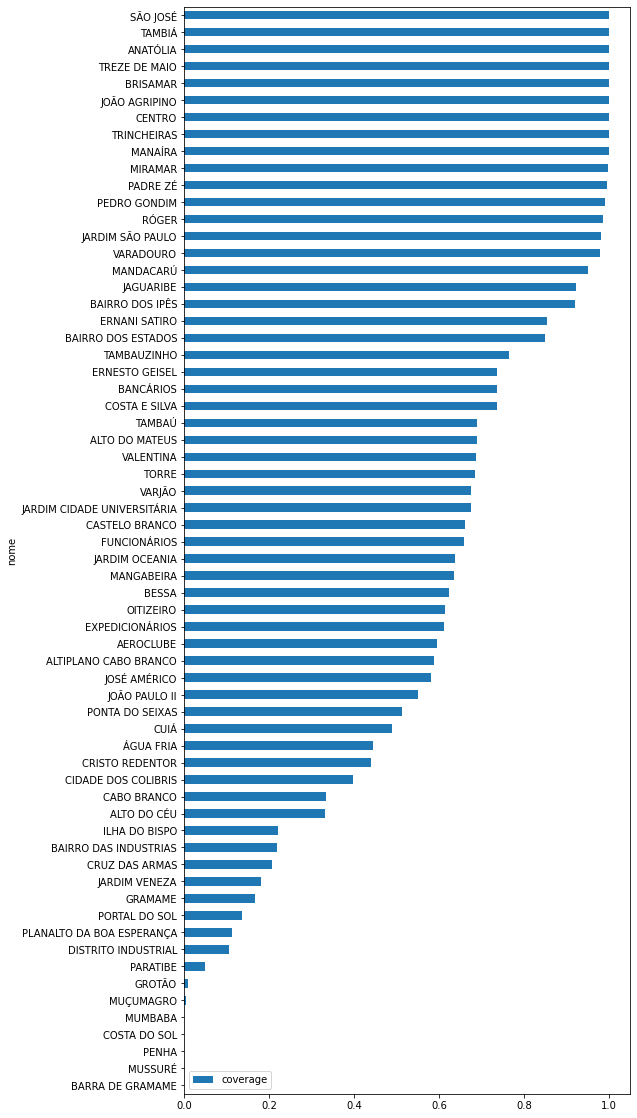

In [20]:
bairros.sort_values(by='coverage').plot.barh(x='nome', y='coverage', figsize=(8,20))

<AxesSubplot:>

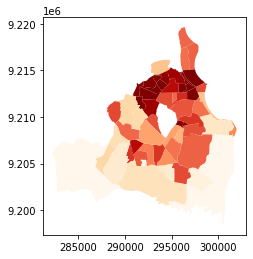

In [21]:
bairros.plot(column='coverage', cmap='OrRd')